---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling

In [29]:
# Import data

dataset_path = "insurance.csv"
dataset = pd.read_csv(dataset_path)
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [30]:
sex = dataset.pop('sex')
dataset['male'] = (sex == 'male')*1
dataset['female'] = (sex == 'female')*1

smoker = dataset.pop('smoker')
dataset['smoker_yes'] = (smoker == 'yes')*1
dataset['smoker_no'] = (smoker == 'no')*1

region = dataset.pop('region')
dataset['northwest'] = (region == 'northwest')*1
dataset['northeast'] = (region == 'northeast')*1
dataset['southwest'] = (region == 'southwest')*1
dataset['southeast'] = (region == 'southeast')*1

dataset.head()

,age,bmi,children,expenses,male,female,smoker_yes,smoker_no,northwest,northeast,southwest,southeast
0,19,27.9,0,16884.92,0,1,1,0,0,0,1,0
1,18,33.8,1,1725.55,1,0,0,1,0,0,0,1
2,28,33.0,3,4449.46,1,0,0,1,0,0,0,1
3,33,22.7,0,21984.47,1,0,0,1,1,0,0,0
4,32,28.9,0,3866.86,1,0,0,1,1,0,0,0


In [28]:
catColumns = ["sex", "smoker", "region"]
dataset = pd.get_dummies(dataset, columns = catColumns, drop_first=True)
dataset = dataset.applymap(lambda x: 1 if x is True else 0 if x is False else x)

dataset.head()

KeyError: "None of [Index(['sex', 'smoker', 'region'], dtype='object')] are in the [columns]"

In [31]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [32]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.0,26.0,39.0,51.0,64.0
bmi,1070.0,30.737290,6.065193,16.0,26.3,30.5,34.8,53.1
children,1070.0,1.093458,1.211364,0.0,0.0,1.0,2.0,5.0
male,1070.0,0.498131,0.500230,0.0,0.0,0.0,1.0,1.0
female,1070.0,0.501869,0.500230,0.0,0.0,1.0,1.0,1.0
smoker_yes,1070.0,0.199065,0.399484,0.0,0.0,0.0,0.0,1.0
smoker_no,1070.0,0.800935,0.399484,0.0,1.0,1.0,1.0,1.0
northwest,1070.0,0.235514,0.424518,0.0,0.0,0.0,0.0,1.0
northeast,1070.0,0.248598,0.432402,0.0,0.0,0.0,0.0,1.0
southwest,1070.0,0.234579,0.423934,0.0,0.0,0.0,0.0,1.0


In [33]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [34]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Linear regression   
  ])
  optimizer = tf.keras.optimizers.RMSprop()

  model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae','mse'])
  model.summary()
  return model

model = build_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# 1

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print("")
    print('.', end='')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

EPOCHS = 1000
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........

In [ ]:
# 2 - Alternative
EPOCHS = 1000
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=1, 
                    callbacks=[tf.keras.callbacks.ModelCheckpoint("./checkpoint.keras", save_best_only=True, monitor='val_loss')])


Epoch 1/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1529.0309 - mae: 1529.0309 - mse: 18021368.0000 - val_loss: 1722.8430 - val_mae: 1722.8430 - val_mse: 20294230.0000
Epoch 2/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1719.2544 - mae: 1719.2544 - mse: 23495740.0000 - val_loss: 1718.2665 - val_mae: 1718.2665 - val_mse: 20315498.0000
Epoch 3/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1458.8566 - mae: 1458.8566 - mse: 18445958.0000 - val_loss: 1724.0630 - val_mae: 1724.0630 - val_mse: 20228046.0000
Epoch 4/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1226.1598 - mae: 1226.1598 - mse: 12425912.0000 - val_loss: 1717.2443 - val_mae: 1717.2443 - val_mse: 20316408.0000
Epoch 5/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1530.3362 - mae: 1530.3362 - mse: 18324976.0000 - val_loss: 1718.6538 - val_mae: 1718.6538 - val_mse: 20239426.0000
Epoch 6/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1745.6925 - mae: 1745.6925 - mse: 23044802.0000 - val_loss: 

Testing set Mean Abs Error: 2190.99 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 441us/step


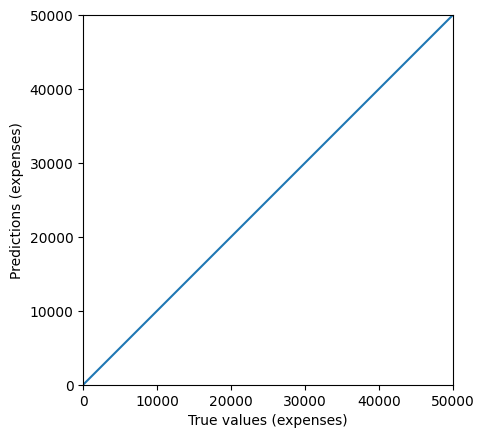

In [36]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)


## Manual Testing

In [41]:
print(test_labels.head(1))
test_dataset.head(1)

11    27808.73
Name: expenses, dtype: float64


,age,bmi,children,male,female,smoker_yes,smoker_no,northwest,northeast,southwest,southeast
11,62,26.3,0,0,1,1,0,0,0,0,1


In [42]:
new_input = pd.DataFrame([{
    'age': 62,
    'bmi': 26.3,
    'children': 0,
    'male': 0,
    'female': 1,
    'smoker_yes': 1,
    'smoker_no': 0,
    'northwest': 0,
    'northeast': 0,
    'southwest': 0,
    'southeast': 1
}])

normed_input = (new_input - train_stats['mean']) / train_stats['std']

prediction = model.predict(normed_input)
print(f"Predicted insurance charges: {prediction[0][0]}")

1/1 [==============================] - 0s 11ms/step
Predicted insurance charges: 28318.33203125
